## Problem Statement:
Here, you need to edit this text to descibe the problem that need to be solved. 
Also, you need to determine which machine learning this problem belong to.

## Objectives
Define the objectives/goals that you are targeting in this task

## Working Code

In [12]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression

In [3]:
# load data
df=pd.read_csv("weatherAUS.csv")
# check the data dimention and print first few rows
df.head()
df.shape
# code goes here

(248577, 24)

### Categorical or Continous?
Define which variables are categorical and which are not

In [13]:
# code goes here

num_var=df.select_dtypes(include=["number"]).columns.values
print(num_var)

cat_var=df.select_dtypes(exclude=["number"]).columns.values
print(cat_var)

print(df.dtypes)

['MinTemp' 'MaxTemp' 'Rainfall' 'Evaporation' 'Sunshine' 'WindGustSpeed'
 'WindSpeed9am' 'WindSpeed3pm' 'Humidity9am' 'Humidity3pm' 'Pressure9am'
 'Pressure3pm' 'Cloud9am' 'Cloud3pm' 'Temp9am' 'Temp3pm' 'RISK_MM' 'Year'
 'Month' 'Day' 'temp_diff']
['Date' 'Location' 'WindGustDir' 'WindDir9am' 'WindDir3pm' 'RainToday'
 'RainTomorrow']
Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
Year               int32
Month              int32
Day           

### Explore the categorical variables
You need to judge on the selected techniques of the EDA (i.e., why have you used this techniques?)

In [14]:
# parse the date variable in to year-month-day
df['Date'] = pd.to_datetime(df['Date']) # parse from strings to date time
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
# drop the date column
df.drop('Date', axis=1, inplace= True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day,temp_diff
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,NaN,16.9,21.8,No,0.0,No,2008,12,1,9.5
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,NaN,17.2,24.3,No,0.0,No,2008,12,2,17.7
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,2.0,21.0,23.2,No,0.0,No,2008,12,3,12.8
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,NaN,18.1,26.5,No,1.0,No,2008,12,4,18.8
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,8.0,17.8,29.7,No,0.2,No,2008,12,5,14.8


In [15]:
#explore target variable

# Count the occurrences of each value in the 'RainTomorrow' column
rain_tomorrow_counts = df["RainTomorrow"].value_counts()

# Print the counts
print(rain_tomorrow_counts)

RainTomorrow
No     187772
Yes     53207
Name: count, dtype: int64


C:\Users\rohit\AppData\Local\Temp\ipykernel_30132\2531337366.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df["RainTomorrow"], palette=["grey","lightgreen"])


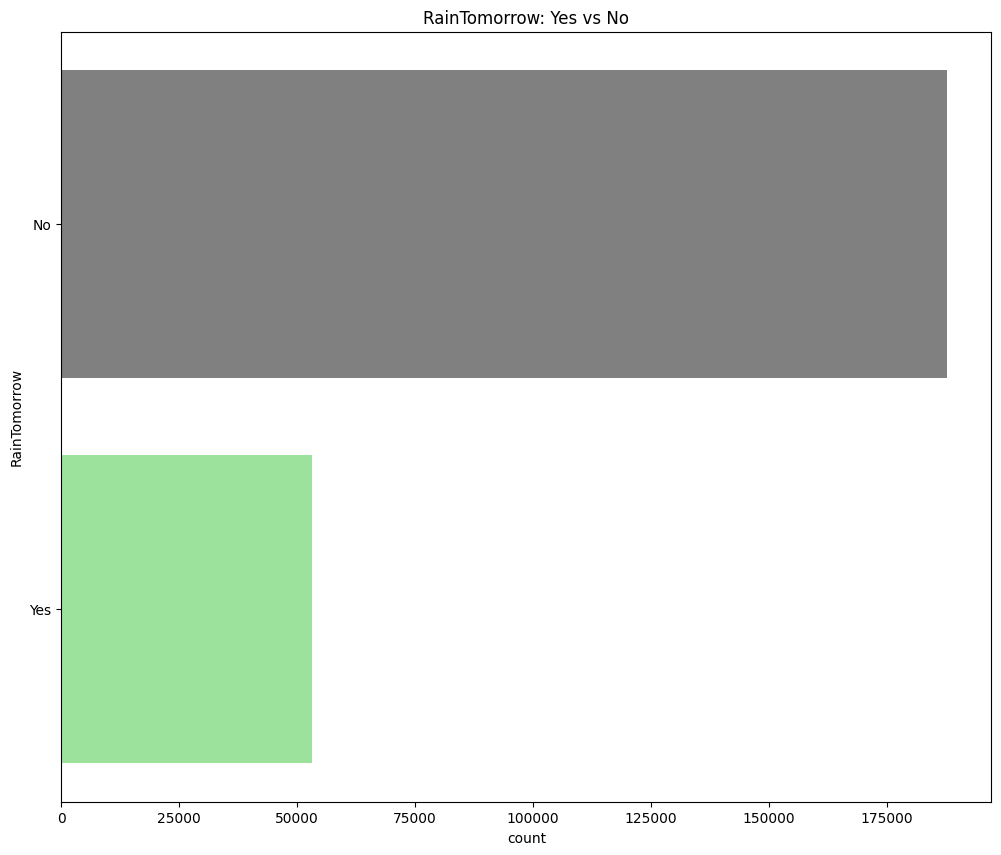

In [16]:
#target variable count plot

plt.figure(figsize=(12,10))
sns.countplot(df["RainTomorrow"], palette=["grey","lightgreen"])
plt.title("RainTomorrow: Yes vs No")
plt.show()

### Explore the contiunous variables
You need to judge on the selected techniques of the EDA (i.e., why have you used this techniques?)

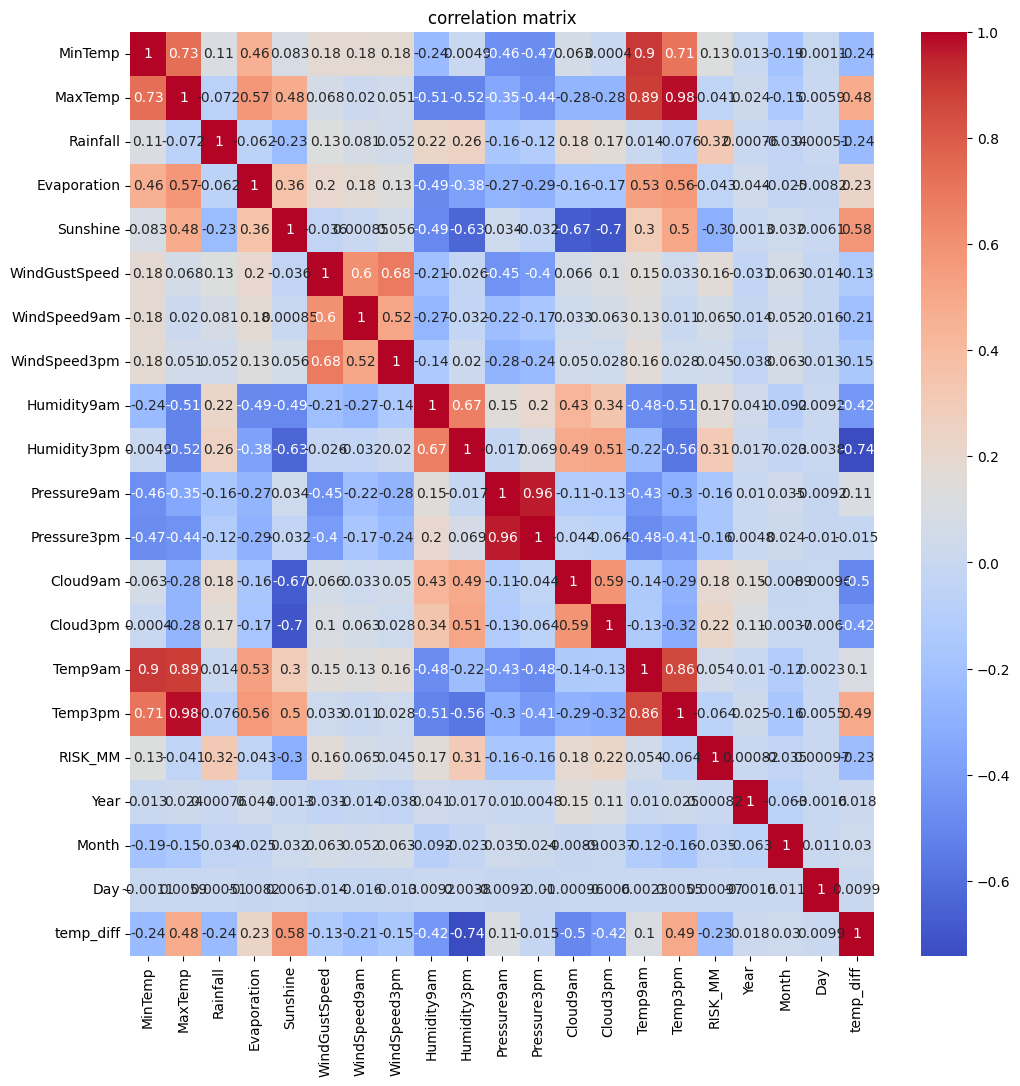

In [18]:
# correlation matrix

numeric_data=df[num_var]
corr_matrix=numeric_data.corr()

plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("correlation matrix")
plt.show()


ValueError: num must be an integer with 1 <= num <= 20, not 21

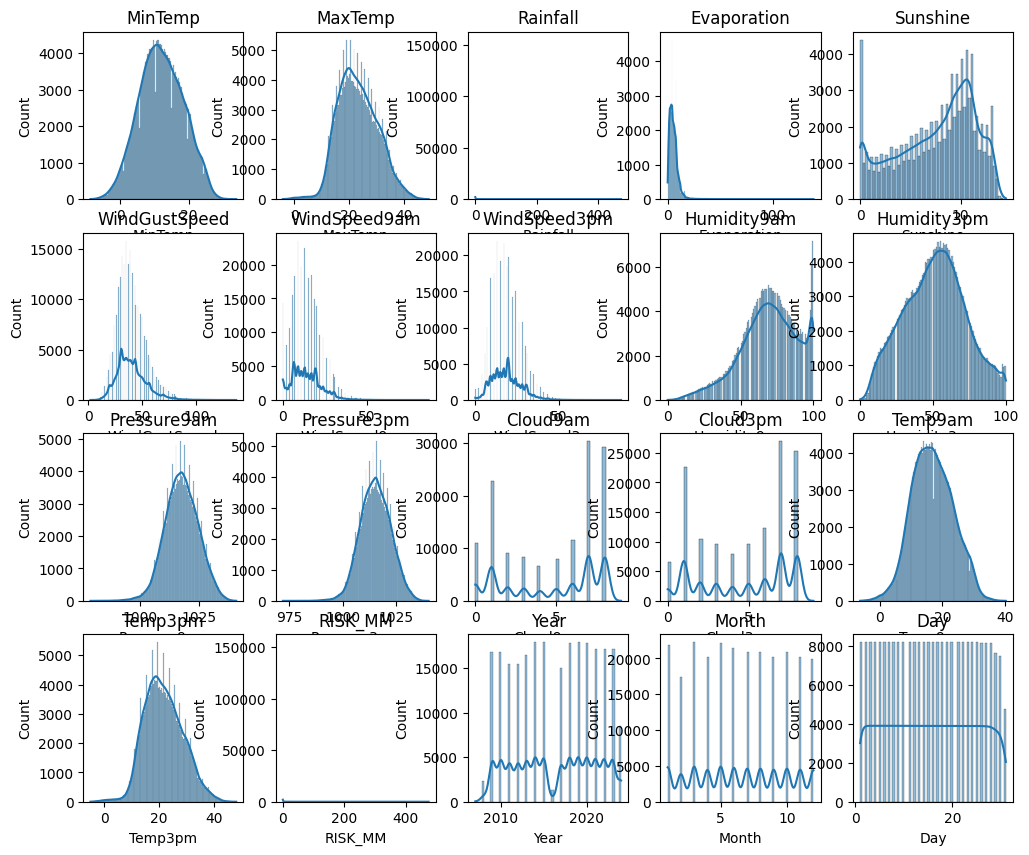

In [20]:
#distribution of numeric features

plt.figure(figsize=(12,10))
for i, col in enumerate(numeric_data):
    plt.subplot(4,5, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

### Split data into separate training (70%) and test set (30%) 

In [21]:
# code goes here

X=df.drop(columns=["RainTomorrow"])
y=df["RainTomorrow"]
print(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

print(X_train.shape,y_train.shape)

       Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0        Albury     13.4     22.9       0.6          NaN       NaN   
1        Albury      7.4     25.1       0.0          NaN       NaN   
2        Albury     12.9     25.7       0.0          NaN       NaN   
3        Albury      9.2     28.0       0.0          NaN       NaN   
4        Albury     17.5     32.3       1.0          NaN       NaN   
...         ...      ...      ...       ...          ...       ...   
248572    Uluru      2.6     19.8       0.0          NaN       NaN   
248573    Uluru      2.3     22.1       0.0          NaN       NaN   
248574    Uluru      3.7     24.2       0.0          NaN       NaN   
248575    Uluru      6.0     27.5       0.0          NaN       NaN   
248576    Uluru     12.7     15.9       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Cloud9am  \
0                W           44.0          W        WNW  ...       8.0   
1          

### Feature engineering (i.e., handling missings and outliers)

In [22]:
#calucalate the difference between max and min temperautre

df["temp_diff"]=df["MaxTemp"]-df["MinTemp"]

Engineering missing values in numerical variables

In [23]:
#imputation with the mean of the variable

imputer = SimpleImputer(strategy="mean")
df[num_var]=imputer.fit_transform(df[num_var])

print(df[num_var].isna().sum())

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RISK_MM          0
Year             0
Month            0
Day              0
temp_diff        0
dtype: int64


Engineering missing values in categorical variables

In [24]:
#imputation with the most frequent value

cat_imputer = SimpleImputer(strategy="most_frequent")
df[cat_var]=cat_imputer.fit_transform(df[cat_var])

print(df[cat_var].isna().sum())

KeyError: "['Date'] not in index"

Engineering outliers

In [ ]:
def detect_outliers(df):
    outliers = {}
    # Loop through each numerical column in the DataFrame
    for col in df.select_dtypes(include=['number']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        # Define outlier boundaries
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Identify outliers
        outlier_indices = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        outliers[col] = outlier_indices
    return outliers

# Example usage
outliers_dict = detect_outliers(df)
for col, outliers in outliers_dict.items():
    print(f"Outliers in {col}: {len(outliers)} rows")


In [ ]:
# Log transform skewed features
skewed_features = ['Rainfall', 'Evaporation']
df[skewed_features] = np.log1p(df[skewed_features])

# Encode categorical variables
categorical_cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

### Data modelling
Please select at least three techniques as your selected data modelling. Please explain your choices 

Logistic Regression

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score, precision_score, recall_score


#import model
from sklearn.linear_model import LogisticRegression

#create instance of the model
lreg=LogisticRegression()

#pass the training data into model
lreg.fit(X_train,y_train)

##predict the model

y_pred_lreg= lreg.predict(X_test)

#confusion matrix

print("Logistic regression")
print("\n")
print("Confusion matrix")
print(confusion_matrix(y_test, y_pred_lreg))
print("---"*25)

#classification report
print("Classification Report")
print(classification_report(y_test, y_pred_lreg))

#accuracy
print("---"*25)
logreg_accuracy=round(accuracy_score(y_test, y_pred_lreg)*100,2)
print("Accuracy", logreg_accuracy, "%")


Random Forrest classification

In [ ]:
#initialize random forrest classifier
rf_classifier = RandomForestClassifier(random_state=42)

#Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rfc = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rfc)
print("Accuracy:", accuracy)

# Score It
print('Random Forest')
# Confusion matrix
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_rfc))

# Classification report
print('--'*40)
print('Classification Report')
print(classification_report(y_test, y_pred_rfc))

# Accuracy
print('--'*40)
rf_accuracy = round(accuracy_score(y_test, y_pred_rfc)*100,2)
print('Accuracy', rf_accuracy,'%')

Decision Tree Classification

In [ ]:
# Import model
from sklearn.tree import DecisionTreeClassifier

#create model object
dt_classifier=DecisionTreeClassifier()

#fit the model
dt_classifier.fit(X_train,y_train)

#predict
y_pred_dt=dt_classifier.predict(X_test)

#score it
print("decision tree")
print("\n")
print("confusion matrix")
print(classification_report(y_test, y_pred_dt))

#classsification report
print("--"*40)
print(classification_report(y_test, y_pred_dt))

#accuracy
print("---"*40)
dt_accuracy=round(accuracy_score(y_test, y_pred_dt)*100,2)
print("Accuracy", dt_accuracy,"%")

## Insights and report results
Please draw your insights here and the most interesting finidng and reflect on the achieved goals

In [ ]:
models=pd.DataFrame({"Model":["Logistic Regression", "Random Forrest", "Decisoin Tree"],
                     "Score":[logreg_accuracy, rf_accuracy, dt_accuracy ]})

models.sort_values(by="Score", ascending=False)